In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to flatten images (28x28 -> 784)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [3]:
# Create model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2856 - accuracy: 0.9184 - val_loss: 0.1546 - val_accuracy: 0.9559
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1224 - accuracy: 0.9639 - val_loss: 0.1068 - val_accuracy: 0.9699
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9753 - val_loss: 0.0948 - val_accuracy: 0.9727
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0633 - accuracy: 0.9808 - val_loss: 0.0859 - val_accuracy: 0.9757
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0496 - accuracy: 0.9852 - val_loss: 0.0860 - val_accuracy: 0.9744
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0841 - val_accuracy: 0.9758
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0316 - accuracy: 0.9900 - val_loss: 0.0874 - val_accuracy:

313/313 [==============================] - 0s 1ms/step - loss: 0.0775 - accuracy: 0.9782
Test accuracy: 0.9782000184059143


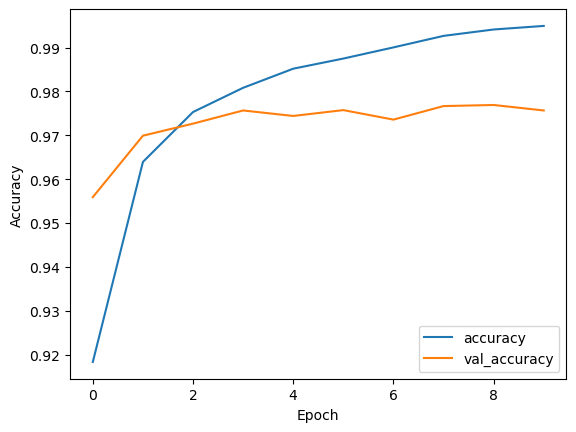

In [5]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 [==============================] - 0s 963us/step


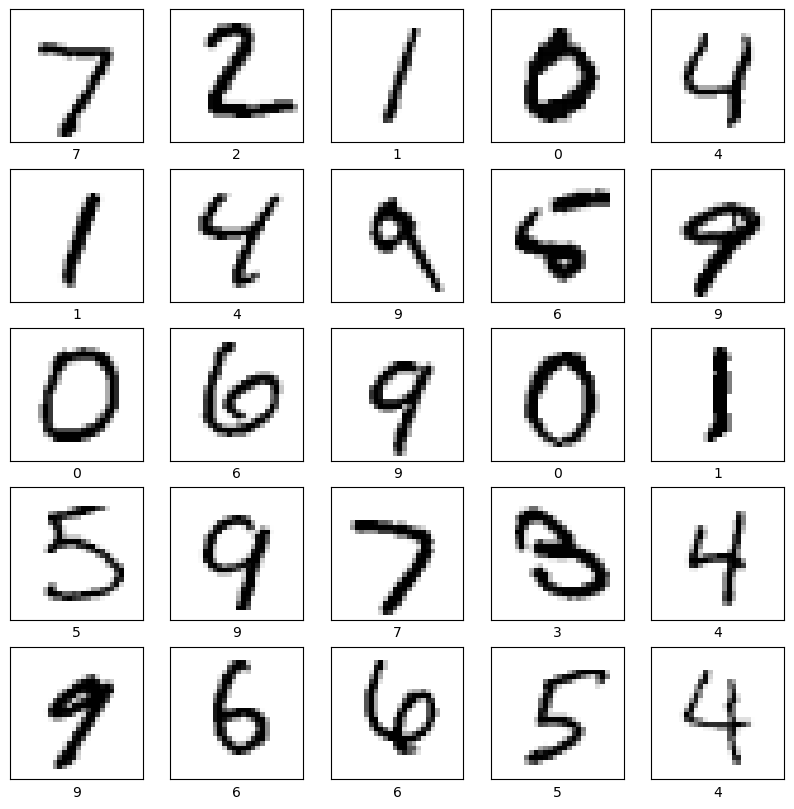

In [6]:
# Make predictions
predictions = model.predict(x_test)

# Visualize sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
